**Evaluating the Impact of Marketing Campaign**s

In [61]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [62]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test_group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test_group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [64]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [65]:
#To remane my column

df.columns = df.columns.str.strip().str.replace('-', '_')
df.columns

Index(['Unnamed: 0', 'user id', 'test_group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

<Axes: xlabel='test_group', ylabel='count'>

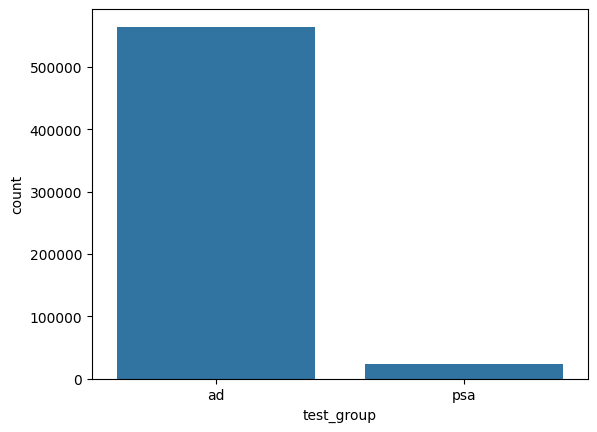

In [66]:
sns.countplot(data=df, x='test_group')

There more ads than  Public Service Announcement (PSA) in the chart above

Using EDA

test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


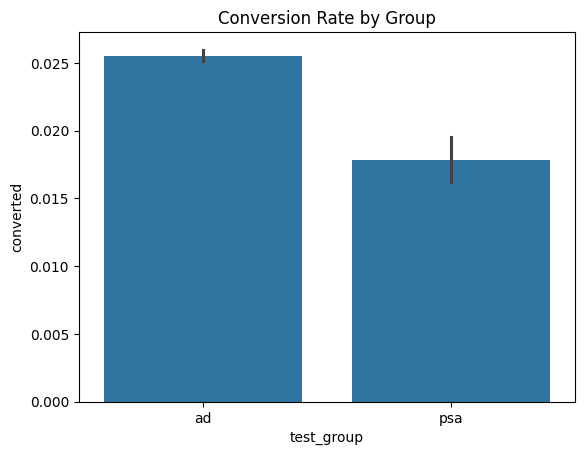

In [67]:
# Overall conversion rate by group
conversion_by_group = df.groupby('test_group')['converted'].mean()
print(conversion_by_group)

# Bar plot
sns.barplot(x='test_group', y='converted', data=df)
plt.title("Conversion Rate by Group")
plt.show()

Hypothesis testing

H_0: Mean ads viewed are equal between groups

H_1: Mean ads viewed are not equal between groups

In [68]:
# Optional: Clean up any missing values in 'Total Ads'
df = df.dropna(subset=['total ads', 'test_group'])

# Split into ad and psa groups based on Test Group
ad_group = df[df['test_group'].str.lower() == 'ad']
psa_group = df[df['test_group'].str.lower() == 'psa']

# Run independent t-test on 'Total Ads'
t_stat, p_val_ads = ttest_ind( ad_group['total ads'], psa_group['total ads'],equal_var=False)  # Welch’s t-test (safer when variances are unequal)

# Print results
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_val_ads:.4f}")

if p_val_ads < 0.05:
    print("Reject the null hypothesis")
else:
    print("Accept alternative hypothesis")

T-statistic = 0.218
P-value     = 0.8274
Accept alternative hypothesis


Conclusion: Since the p-value is greater than 0.05, Null hypothesis was rejected.

Mean ads viewed are not equal between groups

Hypotheses Testing Using Z test

Null Hypothesis (H₀):
There is no difference in conversion rates between the ad group and the PSA group.

Alternative Hypothesis: There is a difference in conversion ratesbetween the ad group and the PSA group.

In [69]:
# Group data
ad_group = df[df['test_group'].str.lower() == 'ad']
psa_group = df[df['test_group'].str.lower() == 'psa']

# Count conversions
successes = [ad_group['converted'].sum(), psa_group['converted'].sum()]
samples = [len(ad_group), len(psa_group)]

# Run z-test
z_stat, p_val = proportions_ztest(successes, samples)

print(f"Z-statistic = {z_stat:.3f}")
print(f"P-value = {p_val:.4f}")

if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Accept alternative hypothesis")

Z-statistic = 7.370
P-value = 0.0000
Reject the null hypothesis


Conclusion: Since the p-value is < 0.05 hence there is a difference in conversion ratesbetween the ad group and the PSA group

Chi-square distribution

Null hypothesis: There is no relationship between test group and converted

Alternative hypothesis: There is a relationship between test group and converted

In [70]:
df['test_group'].value_counts()

,count
test_group,
ad,564577
psa,23524


In [71]:
df['converted'].value_counts()

,count
converted,
False,573258
True,14843


In [72]:
# Step 2: looking at the frequency distribution
pd.crosstab(df.test_group, df.converted, margins = True)

converted,False,True,All
test_group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


In [73]:
# this is known as the observed frequencies

observed = pd.crosstab(df.test_group, df.converted)
observed

converted,False,True
test_group,,
ad,550154,14423
psa,23104,420


In [74]:
#to return chi2 parameters
from scipy.stats import chi2
from scipy.stats import chi2_contingency

chi2_contingency(observed)

Chi2ContingencyResult(statistic=np.float64(54.005823883685245), pvalue=np.float64(1.9989623063390075e-13), dof=1, expected_freq=array([[550327.71899045,  14249.28100955],
       [ 22930.28100955,    593.71899045]]))

In [75]:
#the above result is a 1 by 4 shaped result
#so we use [] to select each of the results and assign it to a variable name

chi2_test_stat = chi2_contingency(observed)[0]
p_val = chi2_contingency(observed)[1]
dof = chi2_contingency(observed)[2]

In [76]:
chi2_test_stat

np.float64(54.005823883685245)

In [77]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1-alpha, dof)

chi2_critical

np.float64(2.705543454095404)

In [78]:
#applying decision rule

if (chi2_test_stat > chi2_critical):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


In [79]:
if (p_val < alpha):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis


Conclusion

There is a relationship between test group and converted

Estimate the potential revenue generated from the ads

In [80]:
#Let assumed that each conversion is $5
revenue_per_conversion = 5

conversion_rate_ad = ad_group['converted'].mean()
conversion_rate_psa = psa_group['converted'].mean()
difference = conversion_rate_ad - conversion_rate_psa

potential_revenue_gain = difference * len(ad_group) * revenue_per_conversion

print(f"Estimated revenue increase due to ads: ${potential_revenue_gain:,.2f}")

Estimated revenue increase due to ads: $21,714.91
